In [1]:
import tkinter as tk


In [2]:
from tkinter import filedialog

In [3]:
pip install brukeropusreader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from brukeropusreader import read_file
from scipy.signal import savgol_filter  # Import for SavGol filter

In [5]:
def open_file_and_plot():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

In [6]:
    # Open file dialog and get the file path
    file_path = filedialog.askopenfilename()

In [7]:
  if file_path:
        # Reading the OPUS file
        opus_data = read_file(file_path)

In [8]:
   file_name = os.path.basename(file_path)

In [9]:
absorbance = opus_data['AB']

In [10]:

start_wn = opus_data['AB Data Parameter']['FXV']
end_wn = opus_data['AB Data Parameter']['LXV']
num_points = opus_data['AB Data Parameter']['NPT']

In [11]:
num_points = len(absorbance)

In [12]:
wavenumbers = np.linspace(start_wn, end_wn, num_points)

In [13]:
assert len(wavenumbers) == len(absorbance), "Wavenumbers and absorbance arrays must be the same length."


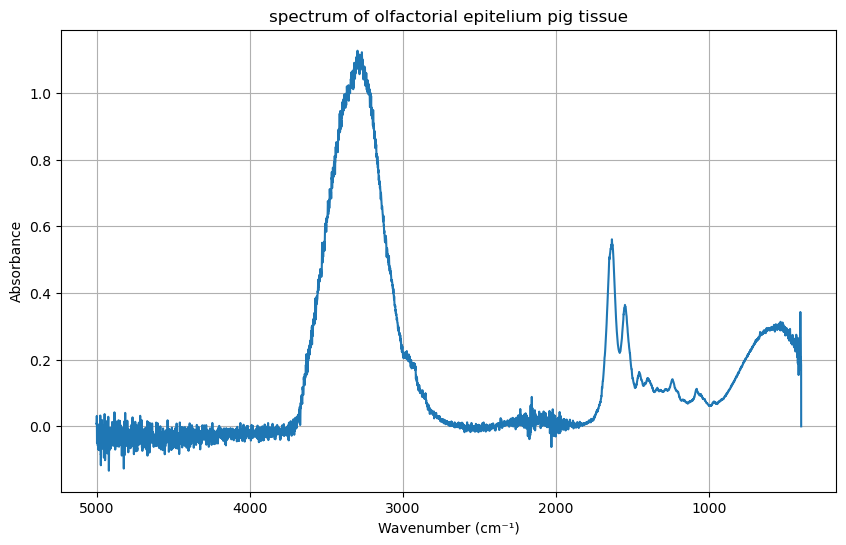

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title('spectrum of olfactorial epitelium pig tissue')  # Using the file name as the title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()

In [35]:
 # SavGol smoothing parameters (adjust as needed)
window_length = 21  # Number of points in the smoothing window (odd number recommended)
polyorder = 1      # Order of the polynomial for fitting (higher reduces high-frequency noise)


In [36]:
# Apply SavGol smoothing
smoothed_absorbance = savgol_filter(absorbance, window_length, polyorder)


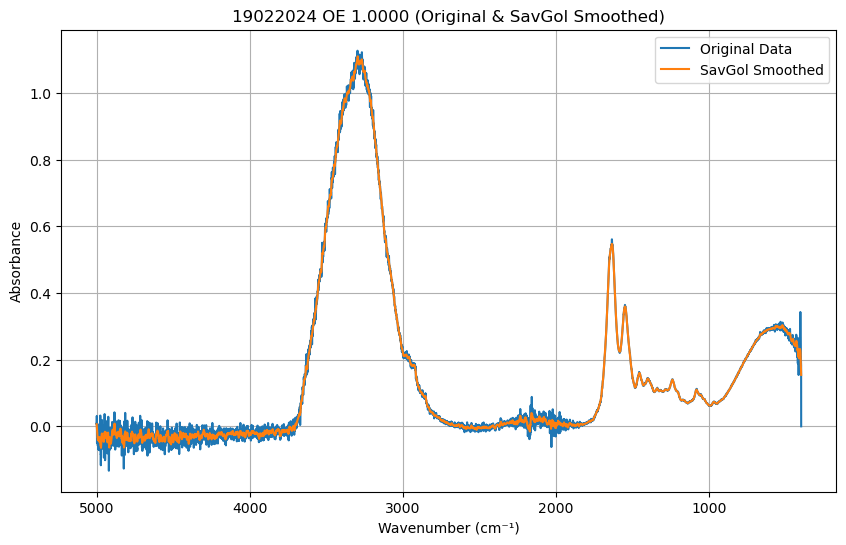

In [37]:
plt.figure(figsize=(10, 6))

        # Plot both original and smoothed dat
plt.plot(wavenumbers, absorbance, label='Original Data')
plt.plot(wavenumbers, smoothed_absorbance, label='SavGol Smoothed')

plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(f"{file_name} (Original & SavGol Smoothed)")  # Informative title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis

plt.legend()  # Add legend to distinguish lines
plt.show()
open_file_and_plot()

In [23]:
# Restrict wavenumbers to the desired range
allowed_indices = np.where((wavenumbers >= 1600) & (wavenumbers <= 1700))[0]
wavenumbers_Amide1 = wavenumbers[allowed_indices]
absorbance_Amide1 = absorbance[allowed_indices]

ValueError: x and y must have same first dimension, but have shapes (280,) and (12895,)

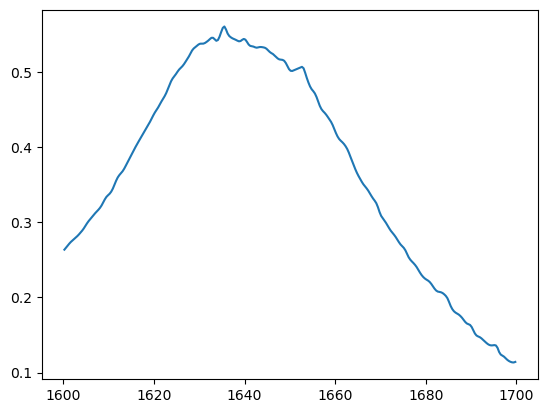